# TP Scrapping

## Objective

In this lab work, you will have a look on how to scrap and process some non-structured data directly from the web. 
You will use BeautifulSoup, a framework to interpret HTML pages.

## Work to do

Internet Movie DataBase (IMDB) is a movie database containing many informations.
In this labwork, you will extract informations on 100 films of 2019.

Films are reachable at this adress :
http://www.imdb.com/search/title?release_date=2019&page=0


### Declare Libraries (`BeautifulSoup`, `Pandas`, `Urllib`)

In [1]:
!pip install pandas
!pip install -U matplotlib
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.3.3-cp36-cp36m-manylinux1_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.0
    Uninstalling matplotlib-3.2.0:
      Successfully uninstalled matplotlib-3.2.0
Defaulting to user installation because normal site-packages is not writeable


In [2]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import urllib.request as rq

### Open URL

In [3]:
page_urls = [
    'https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31',
    'https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31&start=51'
]

In [4]:
pages = []

for page_url in page_urls:
    pages.append(rq.Request(page_url))

In [5]:
print(pages)

[<urllib.request.Request object at 0x7f6b7886a450>, <urllib.request.Request object at 0x7f6b7886a1d0>]


### Get HTML file content

In [6]:
page_contents = []

for page in pages:
   with rq.urlopen(page) as response:
      page_contents.append(response.read())

Where are datas on movies ? Seek in the html code to find the good tag :
`div` in class `lister-item mode-advanced` 

In [7]:
soups = []

for page_content in page_contents:
    soups.append(bs(page_content, 'html.parser'))

### Find and fetch all data 

In [8]:
movies_on_pages = []

for soup in soups:
    movies_on_pages.append(soup.find_all('div', attrs={'class': 'lister-item mode-advanced'}))

### For each tag save in a DataFrame panda :
- the title (`h3`)
- actors (paragraph `p`)
- duration (tag `span` class `runtime`)
- genre (tag `span` class `genre`)
- rate (bold text)

In [34]:
# Define DataFrame schema
movie_info = {
    'Title': [],
    'Genre': [],
    'Actors': [],
    'Director': [],
    'Duration': [],
    'Rate': []
}

In [35]:
for movies_each_page in movies_on_pages:
    # Extract movie info
    for movie in movies_each_page:
        # Get title
        movie_info['Title'].append(movie.select_one('h3.lister-item-header > a').text)
        
        # Get name of actors
        tmp_list = []
        for actor in movie.select('div.lister-item-content > p:nth-child(5) > a'):
            tmp_list.append(actor.text)
        movie_info['Actors'].append(', '.join(tmp_list))
        
        # Get name of director
        movie_info['Director'].append(movie.select_one('div.lister-item-content > p:nth-child(5) > a:nth-child(1)').text)

        # Get duration
        try:
            movie_info['Duration'].append(movie.select_one('div.lister-item-content > p.text-muted > span.runtime').text)
        except:
            movie_info['Duration'].append(None)

        # Get genre
        movie_info['Genre'].append(movie.select_one('p.text-muted > span.genre').text.strip('\n'))

        # Get rate
        movie_info['Rate'].append(movie.select_one("div > div.inline-block.ratings-imdb-rating > strong").text)

### Display the  DataFrame using the  title as  an index

In [11]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [36]:
df = pd.DataFrame(movie_info)
df.set_index('Title')
df

,Title,Genre,Actors,Director,Duration,Rate
0,The Mandalorian,"Action, Adventure, Sci-Fi","Pedro Pascal, Gina Carano, Giancarlo Esposito,...",Pedro Pascal,40 min,8.8
1,Vật Chất Tối Của Ngài,"Adventure, Drama, Family","Dafne Keen, Amir Wilson, Kit Connor, Ruth Wilson",Dafne Keen,60 min,7.9
2,Klaus - Câu Chuyện Giáng Sinh,"Animation, Adventure, Comedy","Sergio Pablos, Carlos Martínez López, Jason Sc...",Sergio Pablos,96 min,8.2
3,The Boys,"Action, Comedy, Crime","Karl Urban, Jack Quaid, Antony Starr, Erin Mor...",Karl Urban,60 min,8.7
4,Virgin River,"Drama, Romance","Alexandra Breckenridge, Martin Henderson, Coli...",Alexandra Breckenridge,44 min,7.5
5,Giáng Sinh Năm Ấy,"Comedy, Drama, Romance","Paul Feig, Madison Ingoldsby, Emma Thompson, B...",Paul Feig,103 min,6.5
6,Home for Christmas,"Comedy, Drama, Romance","Ida Elise Broch, Gabrielle Leithaug, Hege Schø...",Ida Elise Broch,29 min,7.7
7,A Christmas Carol,"Drama, Fantasy","Guy Pearce, Andy Serkis, Stephen Graham, Joe A...",Guy Pearce,173 min,7.2
8,Thợ Săn Quái Vật,"Action, Adventure, Fantasy","Henry Cavill, Freya Allan, Yasen Atour, Basil ...",Henry Cavill,60 min,8.2
9,Sound of Metal,"Drama, Music","Darius Marder, Riz Ahmed, Olivia Cooke, Paul R...",Darius Marder,101 min,7.8


### Statistics films 

we would like to know how many films were released in 2019 by category

In [37]:
import pandas as pd

atomic_movie_genre = []

for index, row in df.iterrows():
    tmp_lst = row['Genre'].split(',')
    atomic_movie_genre += [item.strip() for item in tmp_lst]

df_genres = pd.DataFrame(atomic_movie_genre)
df_genres.groupby(atomic_movie_genre).size()

Action       31
Adventure    26
Animation     6
Biography     9
Comedy       30
Crime        21
Drama        64
Family        5
Fantasy      13
History       5
Horror       14
Music         2
Mystery       9
Romance      10
Sci-Fi        9
Thriller     14
War           3
dtype: int64

In [38]:
df.groupby(movie_info['Genre']).size()

Action, Adventure, Comedy                   4
Action, Adventure, Crime                    2
Action, Adventure, Drama                    2
Action, Adventure, Fantasy                  2
Action, Adventure, Sci-Fi                   5
Action, Adventure, Thriller                 1
Action, Biography, Drama                    1
Action, Comedy, Crime                       2
Action, Crime, Drama                        3
Action, Crime, Thriller                     1
Action, Drama, History                      1
Action, Drama, Mystery                      1
Action, Drama, Sci-Fi                       2
Action, Drama, War                          1
Action, Thriller                            1
Adventure, Comedy, Drama                    2
Adventure, Drama, Family                    1
Adventure, Drama, Mystery                   1
Adventure, Family, Fantasy                  1
Animation, Action, Adventure                1
Animation, Action, Fantasy                  1
Animation, Adventure, Comedy      

#### Extract the category column  within a list  (method `values`)

In [39]:
df['Genre'].values.tolist()

['Action, Adventure, Sci-Fi            ',
 'Adventure, Drama, Family            ',
 'Animation, Adventure, Comedy            ',
 'Action, Comedy, Crime            ',
 'Drama, Romance            ',
 'Comedy, Drama, Romance            ',
 'Comedy, Drama, Romance            ',
 'Drama, Fantasy            ',
 'Action, Adventure, Fantasy            ',
 'Drama, Music            ',
 'Action, Comedy, Crime            ',
 'Comedy, Crime, Drama            ',
 'Drama            ',
 'Action, Adventure, Fantasy            ',
 'Biography, Drama            ',
 'Drama, Thriller, War            ',
 'Comedy, Family, Fantasy            ',
 'Comedy, Drama, Thriller            ',
 'Drama, Romance            ',
 'Action, Adventure, Drama            ',
 'Biography, Drama            ',
 'Comedy, Drama            ',
 'Drama, Romance            ',
 'Family            ',
 'Crime, Drama, Thriller            ',
 'Drama, History, Thriller            ',
 'Comedy, Drama, War            ',
 'Comedy, Drama            '

#### Delete unuseful spaces (method 'strip')

In [40]:
print(df)

                                               Title                                     Genre                                             Actors                  Director Duration Rate
0                                    The Mandalorian     Action, Adventure, Sci-Fi              Pedro Pascal, Gina Carano, Giancarlo Esposito,...              Pedro Pascal   40 min  8.8
1                              Vật Chất Tối Của Ngài      Adventure, Drama, Family               Dafne Keen, Amir Wilson, Kit Connor, Ruth Wilson                Dafne Keen   60 min  7.9
2                      Klaus - Câu Chuyện Giáng Sinh  Animation, Adventure, Comedy              Sergio Pablos, Carlos Martínez López, Jason Sc...             Sergio Pablos   96 min  8.2
3                                           The Boys         Action, Comedy, Crime              Karl Urban, Jack Quaid, Antony Starr, Erin Mor...                Karl Urban   60 min  8.7
4                                       Virgin River                Dr

In [41]:
df_strip = df
df_strip[df.columns] = df_strip.apply(lambda cell: cell.str.strip())
print(df_strip)

                                               Title                         Genre                                             Actors                  Director Duration Rate
0                                    The Mandalorian     Action, Adventure, Sci-Fi  Pedro Pascal, Gina Carano, Giancarlo Esposito,...              Pedro Pascal   40 min  8.8
1                              Vật Chất Tối Của Ngài      Adventure, Drama, Family   Dafne Keen, Amir Wilson, Kit Connor, Ruth Wilson                Dafne Keen   60 min  7.9
2                      Klaus - Câu Chuyện Giáng Sinh  Animation, Adventure, Comedy  Sergio Pablos, Carlos Martínez López, Jason Sc...             Sergio Pablos   96 min  8.2
3                                           The Boys         Action, Comedy, Crime  Karl Urban, Jack Quaid, Antony Starr, Erin Mor...                Karl Urban   60 min  8.7
4                                       Virgin River                Drama, Romance  Alexandra Breckenridge, Martin Henderson, Coli

#### Count number of films for each categories (you can use a dictionnary)

In [26]:
import pandas as pd

atomic_movie_genre = []

for index, row in df.iterrows():
    tmp_lst = row['Genre'].split(',')
    atomic_movie_genre += [item.strip() for item in tmp_lst]

df_genres = pd.DataFrame(atomic_movie_genre)
df_genres.groupby(atomic_movie_genre).size()

Action       31
Adventure    26
Animation     6
Biography     9
Comedy       30
Crime        21
Drama        64
Family        5
Fantasy      13
History       5
Horror       14
Music         2
Mystery       9
Romance      10
Sci-Fi        9
Thriller     14
War           3
dtype: int64


#### Build Pandas serie with the number of films as values and category as index

In [46]:
series = (df_genres.groupby(atomic_movie_genre).size())
print(series.values)
print(series.index)

[31 26  6  9 30 21 64  5 13  5 14  2  9 10  9 14  3]
Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War'], dtype='object')


#### Use `plot.pie` or `plot.bar`from pd.Series to display results to display the results as a pie chart

<AxesSubplot:ylabel='None'>

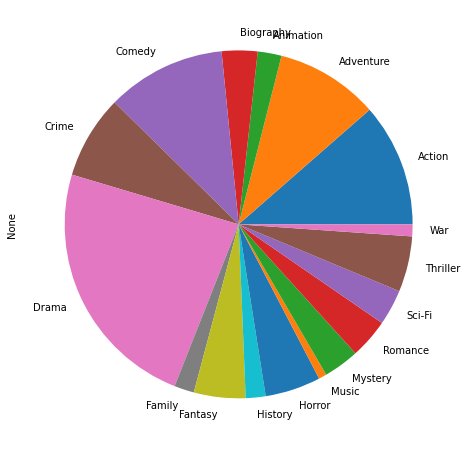

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

series.plot.pie(figsize=(8,8))

<AxesSubplot:>

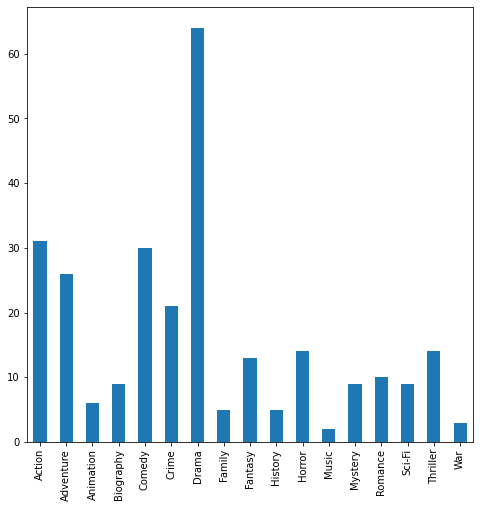

In [51]:
series.plot.bar(figsize=(8,8))

### We would like to have more details

#### extract actors list from the first movie

In [54]:
print(df.values[0][2])

Pedro Pascal, Gina Carano, Giancarlo Esposito, Chris Bartlett


#### Find which movie was directed by `Quentin Tarantino`

In [44]:
print(df[df['Director'].str.contains('Quentin Tarantino')])

                             Title          Genre                                             Actors           Director Duration Rate
21  Chuyện Ngày Xưa Ở... Hollywood  Comedy, Drama  Quentin Tarantino, Leonardo DiCaprio, Brad Pit...  Quentin Tarantino  161 min  7.6
